In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import math
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [8]:
data_path = ('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
crime_df = pd.read_excel(data_path, header=1,
                         index_col=False, skiprows=[0, 1, 2], skipfooter=3)
crime_df.head(20)


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [9]:
crime_df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [10]:
#Clean up column names
crime_df.columns=['City','Population', 'Violent crime', 'Murder', 'Rape revised', 'Rape legacy', 'Robbery', 
         'Aggravated assault','Property crime', 'Burglary', 'Larceny', 'Motor vehicle theft', 'Arson']
crime_df.head(20)

,City,Population,Violent crime,Murder,Rape revised,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [80]:
#Drop Rape Revised columns since it doesn't contain any data
crime_df.drop('Rape revised', 1)

,City,Population,Violent crime,Murder,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0.000


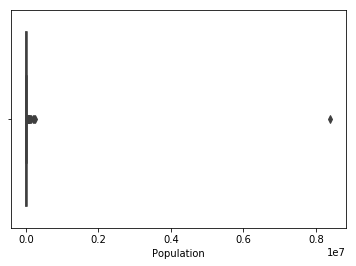

In [11]:
#Graph data and see how it looks--if anything is out of whack
sns.boxplot(crime_df.Population)
plt.show()

In [12]:
#hmmm looks like we have one major outlier. Let's figure out what it is
crime_df['Population'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64

#Make residual a column in the dataframe
regr = linear_model.LinearRegression()
Y = data['Population'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)
crime_df['residual'] = crime_df['Population'] - regr.predict(X).ravel()

In [14]:
outlier = crime_df.loc[crime_df['Population'] == 8396126.000]
print(outlier)

         City  Population  Violent crime  Murder  Rape revised  Rape legacy  \
216  New York     8396126          52384     335           nan         1112   

     Robbery  Aggravated assault  Property crime  Burglary  Larceny  \
216    19170               31767          141971     16606   117931   

     Motor vehicle theft  Arson  
216                 7434    nan  


In [ ]:
#Looks like New York City is skewing our data, so we'll have to transform the variable. 
#Lets try taking the log of that column of data to see if that normalizes the data

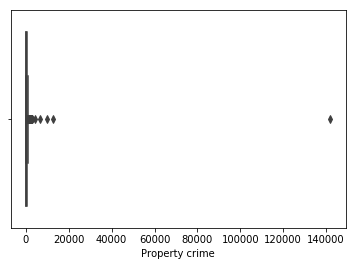

In [15]:
sns.boxplot(crime_df['Property crime'])

In [60]:
crime_df['pop_log'] = np.log(crime_df['Population'])
#control for zero values by adding a value of 1 to each row (can't log zero values)
crime_df['Property crime'] = crime_df['Property crime'] + 1
crime_df['prop_crime_log'] = np.log(crime_df['Property crime'])

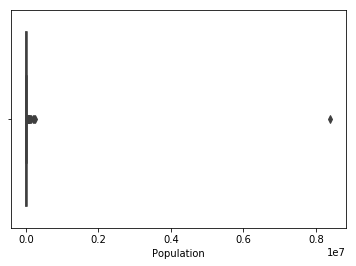

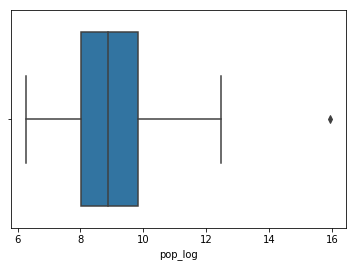

In [56]:
sns.boxplot(crime_df.Population)
plt.show()
sns.boxplot(crime_df.pop_log)
plt.show()

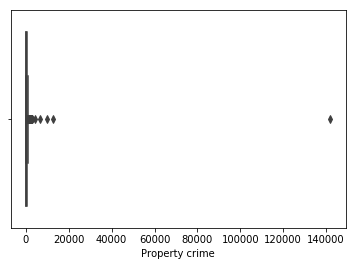

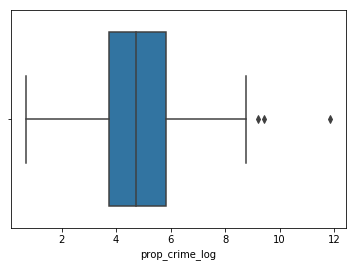

In [61]:
sns.boxplot(crime_df["Property crime"])
plt.show()
sns.boxplot(crime_df.prop_crime_log)
plt.show()

In [51]:
#let's turn murder and robbery into binary features
crime_df['Robbery_Binary'] = crime_df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
crime_df['Murder_Binary'] = crime_df['Murder'].apply(lambda x: 1 if x > 0 else 0)

crime_df.head(20)

,City,Population,Violent crime,Murder,Rape revised,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson,pop_log,prop_crime_log,Robbery_Binary,Murder_Binary
0,Adams Village,1861,0,0,nan,0,0,0,12.000,2,10,0,0.000,7.529,2.485,0,0
1,Addison Town and Village,2577,3,0,nan,0,0,3,24.000,3,20,1,0.000,7.854,3.178,0,0
2,Akron Village,2846,3,0,nan,0,0,3,16.000,1,15,0,0.000,7.954,2.773,0,0
3,Albany,97956,791,8,nan,30,227,526,4090.000,705,3243,142,nan,11.492,8.316,1,1
4,Albion Village,6388,23,0,nan,3,4,16,223.000,53,165,5,nan,8.762,5.407,1,0
5,Alfred Village,4089,5,0,nan,0,3,2,46.000,10,36,0,nan,8.316,3.829,1,0
6,Allegany Village,1781,3,0,nan,0,0,3,10.000,0,10,0,0.000,7.485,2.303,0,0
7,Amherst Town,118296,107,1,nan,7,31,68,2118.000,204,1882,32,3.000,11.681,7.658,1,1
8,Amityville Village,9519,9,0,nan,2,4,3,210.000,16,188,6,1.000,9.161,5.347,1,0
9,Amsterdam,18182,30,0,nan,0,12,18,405.000,99,291,15,0.000,9.808,6.004,1,0


                pop_log  prop_crime_log  Robbery_Binary  Murder_Binary
pop_log           1.000           0.877           0.582          0.503
prop_crime_log    0.877           1.000           0.681          0.492
Robbery_Binary    0.582           0.681           1.000          0.313
Murder_Binary     0.503           0.492           0.313          1.000


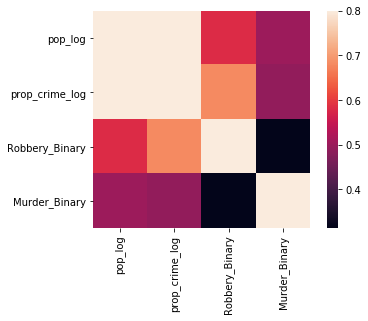

In [62]:
#The logged data looks a lot better, so let's stick with that. lets create a dataframe with variables we're 
#interested in and check the correlation

plotdf = crime_df.loc[:, ['pop_log', 'prop_crime_log', 'Robbery_Binary', 'Murder_Binary']]            
corrmat = plotdf.corr()
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
#Looks like property crime and population are highly collinear, so let's remove population from our model

In [65]:
df = crime_df.loc[:, ['prop_crime_log', 'Robbery', 'Murder','Robbery_Binary', 'Murder_Binary']]   

In [110]:
df.dtypes

level_0             int64
index               int64
prop_crime_log    float64
Robbery             int64
Murder              int64
Robbery_Binary      int64
Murder_Binary       int64
dtype: object

In [66]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['prop_crime_log'].values.reshape(-1, 1)
X = df[['Robbery', 'Murder','Robbery_Binary', 'Murder_Binary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-1.37657614e-03  9.56894720e-02  1.94507131e+00  1.05588737e+00]]

Intercept: 
 [3.4021307]

R-squared:
0.5968738044215394
